In [9]:
import rasterio
import numpy as np
import rasterio.transform
import pandas as pd;
import matplotlib.pyplot as plt
import geopandas as gpd

In [29]:
#file plotting 
def plot(path):
    file = rasterio.open(path)
    plt.imshow(file.read(7))

In [38]:
path ="water_occurence_test-0000000000-0000000000.tif"

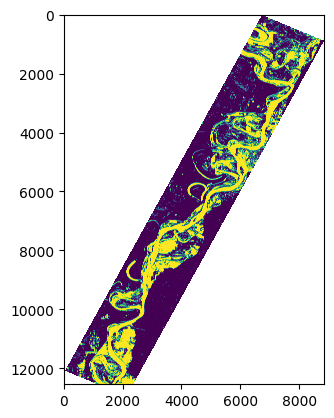

In [39]:
plot(path)

In [32]:
test_path = path

In [33]:
if "entropy" in test_path or "alpha" in test_path:
    print("Entropy")
else:
    print("Not Entropy")


Not Entropy


# Google Earth Data Functions 

In [118]:
def generate_df(path):
    if "entropy" in path:
        data = []
        with rasterio.open(path) as ras:
            print(ras.count)
            data=ras.read(1)
            print(data.shape)
            height=data.shape[0]
            width=data.shape[1]
            cols,rows=np.meshgrid(np.arange(width),np.arange(height))
            xs,ys=rasterio.transform.xy(ras.transform,rows,cols)
            xs=np.array(xs)
            ys=np.array(ys)
            xs=np.round(xs,9)
            ys=np.round(ys,9)
            lat_flat = ys.flatten()
            long_flat = xs.flatten()
            val_flat = np.array(data).flatten()
            lat = pd.DataFrame(lat_flat, columns=['Latitude'])
            long = pd.DataFrame(long_flat, columns=['Longitude'])
            val = pd.DataFrame(val_flat, columns=['Value'])
            df = pd.concat([lat, long, val], axis=1)
            df=df.dropna()
            return df
    elif "alpha" in path:
        data=[]
        with rasterio.open(path) as ras:
            print(ras.count)
            data=ras.read(1)
            print(data.shape)
            height=data.shape[0]
            width=data.shape[1]
            cols,rows=np.meshgrid(np.arange(width),np.arange(height))
            xs,ys=rasterio.transform.xy(ras.transform,rows,cols)
            xs=np.array(xs)
            ys=np.array(ys)
            xs=np.round(xs,9)
            ys=np.round(ys,9)
            lat_flat = ys.flatten()
            long_flat = xs.flatten()
            val_flat = np.array(data).flatten()
            lat = pd.DataFrame(lat_flat, columns=['Latitude'])
            long = pd.DataFrame(long_flat, columns=['Longitude'])
            val = pd.DataFrame(val_flat, columns=['Alpha_Value'])
            df_alpha = pd.concat([lat, long, val], axis=1)
            df_alpha=df_alpha.dropna()
            return df_alpha
    else:
        data = []
        with rasterio.open(path) as ras:
            print(ras.count)
            data=ras.read(1)
            print(data.shape)
            height=data.shape[0]
            width=data.shape[1]
            cols,rows=np.meshgrid(np.arange(width),np.arange(height))
            xs,ys=rasterio.transform.xy(ras.transform,rows,cols)
            xs=np.array(xs)
            ys=np.array(ys)
            lat_flat = ys.flatten()
            long_flat = xs.flatten()
            val_flat = np.array(data).flatten()
            lat = pd.DataFrame(lat_flat, columns=['Latitude'])
            long = pd.DataFrame(long_flat, columns=['Longitude'])
            val = pd.DataFrame(val_flat, columns=['Value'])
            df_combined = pd.concat([lat, long, val], axis=1)
            df_combined=df_combined.dropna()
            return df_combined


In [119]:
def df_plot(df_reference):
    df_filtered = df_reference[df_reference['Value'] >= 50]
    # plt.figure(figsize=(10, 6))
    # plt.scatter(df["Latitude"],df["Longitude"],c=df["Value"],cmap='viridis',s=1)
    plt.scatter(df_filtered['Longitude'], df_filtered['Latitude'], c="blue",s=0.000005)
    plt.show()
    return df_filtered

In [27]:
def filter_nd_plot(df):
    df['value_normalized'] = 1 * (df['Value'] - df['Value'].min()) / (df['Value'].max() - df['Value'].min())
    # df_filtered = df_combined[df_combined['Value'] == 1]
    df_filtered1=df[(df['value_normalized']<0.55 )& (df['Value']>0) & (df["Alpha_Value"]<=(180/4))]
    # plt.figure(figsize=(10, 6))
    plt.scatter(df_filtered1["Longitude"],df_filtered1["Latitude"],c="blue",s=0.00005)
    plt.show()
    return df_filtered1,df

In [6]:
def merge_nd_plot(df_filtered,df_filtered1):
    df_merge_scatter = df_filtered
    df_merge_scatter1=df_filtered1
    plt.scatter(df_merge_scatter1["Longitude"],df_merge_scatter1["Latitude"],c="blue",s=0.00005)
    plt.scatter(df_merge_scatter['Longitude'], df_merge_scatter['Latitude'], c="red",s=0.00005)
    # plt.scatter(df_merge_scatter1["Longitude"],df_merge_scatter1["Latitude"],c="blue",s=0.00005)
    plt.show()

In [120]:
test_path = r"water_occurence_test(2).tif"

In [121]:
df = generate_df(test_path)
df.head()

7
(12897, 8845)


,Latitude,Longitude,Value
245567,32.568871,-90.998805,2.0
245568,32.568871,-90.998705,2.0
254412,32.568772,-90.998805,2.0
254413,32.568772,-90.998705,2.0
263259,32.568673,-90.998605,1.0


In [122]:
df.count()

Latitude     10467742
Longitude    10467742
Value        10467742
dtype: int64

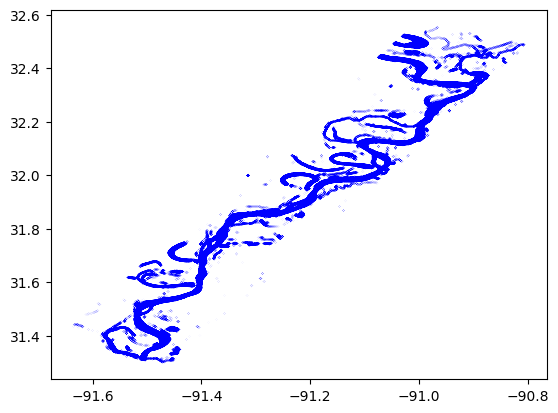

In [123]:
df_filtered = df_plot(df)

# Entropy Data Functions 

In [110]:
ent_path = r"Entropy&Alpha/entropy_3.tif"

In [111]:
df_ent = generate_df(ent_path)
df_ent.head()

1
(12914, 8857)


,Latitude,Longitude,Value
0,32.57735,-91.67395,0.0
1,32.57735,-91.67385,0.0
2,32.57735,-91.67375,0.0
3,32.57735,-91.67365,0.0
4,32.57735,-91.67355,0.0


In [112]:
df_ent.describe()

,Latitude,Longitude,Value
count,1.143793e+08,1.143793e+08,1.143793e+08
mean,3.193170e+01,-9.123115e+01,1.863035e-01
std,3.727951e-01,2.556796e-01,3.123042e-01
min,3.128605e+01,-9.167395e+01,0.000000e+00
25%,3.160885e+01,-9.145255e+01,0.000000e+00
50%,3.193170e+01,-9.123115e+01,0.000000e+00
75%,3.225455e+01,-9.100975e+01,5.219928e-01
max,3.257735e+01,-9.078835e+01,9.928392e-01


In [113]:
alpha_path = r"Entropy&Alpha/alpha_3.tif"

In [114]:
df_alpha = generate_df(alpha_path)
df_alpha.head()

1
(12914, 8857)


,Latitude,Longitude,Alpha_Value
0,32.57735,-91.67395,0.0
1,32.57735,-91.67385,0.0
2,32.57735,-91.67375,0.0
3,32.57735,-91.67365,0.0
4,32.57735,-91.67355,0.0


In [115]:
df_alpha.describe()

,Latitude,Longitude,Alpha_Value
count,1.143793e+08,1.143793e+08,1.143793e+08
mean,3.193170e+01,-9.123115e+01,1.202995e+01
std,3.727951e-01,2.556796e-01,2.014711e+01
min,3.128605e+01,-9.167395e+01,0.000000e+00
25%,3.160885e+01,-9.145255e+01,0.000000e+00
50%,3.193170e+01,-9.123115e+01,0.000000e+00
75%,3.225455e+01,-9.100975e+01,3.485386e+01
max,3.257735e+01,-9.078835e+01,8.560217e+01


In [116]:
df_ent=pd.merge(df_ent,df_alpha,how="inner")

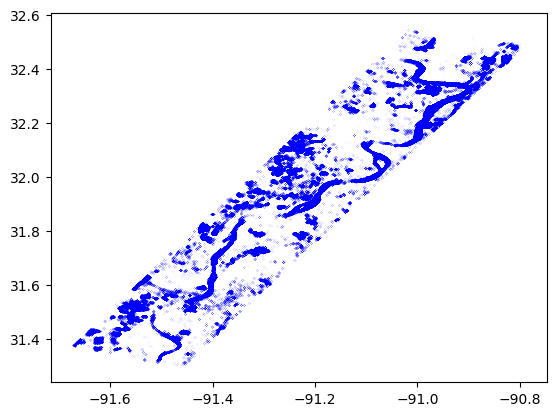

(           Latitude  Longitude     Value  Alpha_Value  value_normalized
 2805373    32.54575  -91.01785  0.531111    38.065056          0.534942
 2814230    32.54565  -91.01785  0.510981    38.834736          0.514666
 2823086    32.54555  -91.01795  0.433229    38.475391          0.436354
 2823087    32.54555  -91.01785  0.500711    39.016918          0.504323
 2823088    32.54555  -91.01775  0.531379    39.202965          0.535212
 ...             ...        ...       ...          ...               ...
 112698629  31.30495  -91.45785  0.541698    44.400967          0.545605
 112760492  31.30425  -91.47145  0.538669    43.316711          0.542555
 112760493  31.30425  -91.47135  0.544132    42.895901          0.548057
 112760494  31.30425  -91.47125  0.542470    43.064934          0.546383
 112857903  31.30315  -91.47305  0.533663    33.988880          0.537512
 
 [1919475 rows x 5 columns],
            Latitude  Longitude  Value  Alpha_Value  value_normalized
 0          32.57735  -

In [117]:
filter_nd_plot(df_ent)

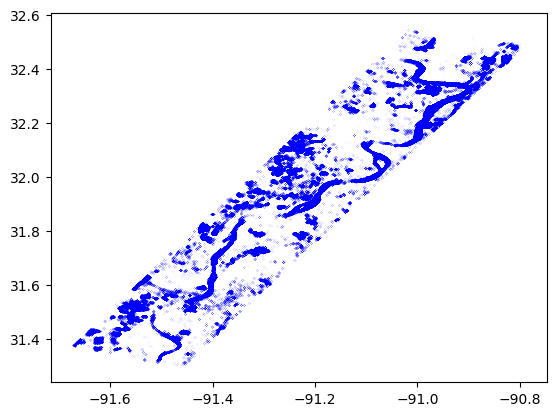

In [124]:
df_filtered1,test_df = filter_nd_plot(df_ent)

In [125]:
test_df.head()

,Latitude,Longitude,Value,Alpha_Value,value_normalized
0,32.57735,-91.67395,0.0,0.0,0.0
1,32.57735,-91.67385,0.0,0.0,0.0
2,32.57735,-91.67375,0.0,0.0,0.0
3,32.57735,-91.67365,0.0,0.0,0.0
4,32.57735,-91.67355,0.0,0.0,0.0


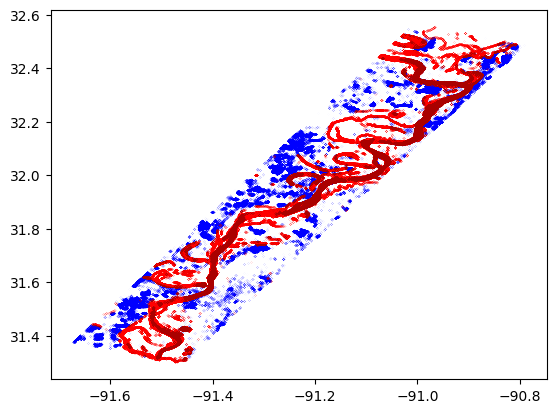

In [126]:
merge_nd_plot(df_filtered,df_filtered1)

In [127]:
gdf1 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude'])
)

gdf2 = gpd.GeoDataFrame(
    test_df, geometry=gpd.points_from_xy(test_df['Longitude'], test_df['Latitude'])
)

# Perform a spatial join with how="left" to find which points from gdf2 are within the buffered points of gdf1
joined_gdf = gpd.sjoin_nearest(gdf2, gdf1, how="inner", max_distance=0.0001, distance_col="distance")

# Filter out the rows where the join was successful, indicating that the points from gdf2 are represented in gdf1

In [92]:
# gdf1 = gpd.GeoDataFrame(
#     df_filtered, geometry=gpd.points_from_xy(df_filtered['Longitude'], df_filtered['Latitude'])
# )

# gdf2 = gpd.GeoDataFrame(
#     df_filtered1, geometry=gpd.points_from_xy(df_filtered1['Longitude'], df_filtered1['Latitude'])
# )

# # Perform a spatial join with how="left" to find which points from gdf2 are within the buffered points of gdf1
# joined_gdf = gpd.sjoin_nearest(gdf2, gdf1, how="left", max_distance=0.0001, distance_col="distance")

# # Filter out the rows where the join was successful, indicating that the points from gdf2 are represented in gdf1
# validated_points = joined_gdf[joined_gdf.index_right.notnull()]
# validated_points = validated_points.drop_duplicates()
# print(validated_points)

In [93]:
# validated = validated_points.geometry.apply(lambda geom: (geom.x, geom.y))
# joined_x, joined_y = zip(*validated)

# # Create a scatter plot
# plt.figure(figsize=(10, 8))
# plt.scatter(joined_x, joined_y, color='green', label='Joined Points',s=0.0005)

# Test codes 

In [94]:
# import pandas as pd
# import geopandas as gpd
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Assuming df_filtered is your reference DataFrame where water is 1
# # Assuming df_filtered1 is your entropy-based test DataFrame with values below 0.75

# # Convert DataFrames to GeoDataFrames
# gdf_reference = gpd.GeoDataFrame(
#     df_filtered, geometry=gpd.points_from_xy(df_filtered['Longitude'], df_filtered['Latitude'])
# )

# gdf_test = gpd.GeoDataFrame(
#     df_filtered1, geometry=gpd.points_from_xy(df_filtered1['Longitude'], df_filtered1['Latitude'])
# )

# # Perform spatial join to align data
# joined_gdf = gpd.sjoin_nearest(gdf_test, gdf_reference, how='left', max_distance=0.0001, distance_col="distance")

# # Add binary column for water presence in reference data
# joined_gdf['reference_water'] = joined_gdf.index_right.notnull().astype(int)

# # Add binary column for water presence in test data (assuming already binary based on threshold)
# joined_gdf['test_water'] = 1  # because df_filtered1 contains only the points where water is expected

# # Compute Precision, Recall, F1 Score
# precision = precision_score(joined_gdf['reference_water'], joined_gdf['test_water'])
# recall = recall_score(joined_gdf['reference_water'], joined_gdf['test_water'])
# f1 = f1_score(joined_gdf['reference_water'], joined_gdf['test_water'])

# print(f'Precision: {precision:.4f}')
# print(f'Recall: {recall:.4f}')
# print(f'F1 Score: {f1:.4f}')


In [128]:
joined_gdf.head()

,Latitude_left,Longitude_left,Value_left,Alpha_Value,value_normalized,geometry,index_right,Latitude_right,Longitude_right,Value_right,distance
750739,32.56895,-90.99885,0.0,0.0,0.0,POINT (-90.99885 32.56895),245567,32.568871,-90.998805,2.0,0.000091
759596,32.56885,-90.99885,0.0,0.0,0.0,POINT (-90.99885 32.56885),245567,32.568871,-90.998805,2.0,0.000050
750740,32.56895,-90.99875,0.0,0.0,0.0,POINT (-90.99875 32.56895),245568,32.568871,-90.998705,2.0,0.000091
750741,32.56895,-90.99865,0.0,0.0,0.0,POINT (-90.99865 32.56895),245568,32.568871,-90.998705,2.0,0.000096
759597,32.56885,-90.99875,0.0,0.0,0.0,POINT (-90.99875 32.56885),245568,32.568871,-90.998705,2.0,0.000050


In [137]:
len(joined_gdf)

10845411

In [146]:
joined_gdf['Value_right']=(joined_gdf['Value_right'] >= 50).astype(int)

In [147]:
joined_gdf['detected_water'] = (joined_gdf['value_normalized'] < 0.55) & (joined_gdf['Alpha_Value'] < 45)

In [148]:
len(joined_gdf)

10845411

In [149]:
joined_gdf['detected_water'] = joined_gdf['detected_water'].astype(int)

In [150]:
joined_gdf=joined_gdf.dropna()

In [151]:
joined_gdf.head()

,Latitude_left,Longitude_left,Value_left,Alpha_Value,value_normalized,geometry,index_right,Latitude_right,Longitude_right,Value_right,distance,detected_water
750739,32.56895,-90.99885,0.0,0.0,0.0,POINT (-90.99885 32.56895),245567,32.568871,-90.998805,0,0.000091,1
759596,32.56885,-90.99885,0.0,0.0,0.0,POINT (-90.99885 32.56885),245567,32.568871,-90.998805,0,0.000050,1
750740,32.56895,-90.99875,0.0,0.0,0.0,POINT (-90.99875 32.56895),245568,32.568871,-90.998705,0,0.000091,1
750741,32.56895,-90.99865,0.0,0.0,0.0,POINT (-90.99865 32.56895),245568,32.568871,-90.998705,0,0.000096,1
759597,32.56885,-90.99875,0.0,0.0,0.0,POINT (-90.99875 32.56885),245568,32.568871,-90.998705,0,0.000050,1


In [153]:
TP = ((joined_gdf['detected_water'] == 1) & (joined_gdf['Value_right'] == 1)).sum()
FP = ((joined_gdf['detected_water'] == 1) & (joined_gdf['Value_right'] == 0)).sum()
TN = ((joined_gdf['detected_water'] == 0) & (joined_gdf['Value_right'] == 0)).sum()
FN = ((joined_gdf['detected_water'] == 0) & (joined_gdf['Value_right'] == 1)).sum()

In [154]:
TP,FP,TN,FN

(941584, 348897, 7377530, 2177400)

In [155]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(joined_gdf['Value_right'], joined_gdf['detected_water'])
precision = precision_score(joined_gdf['Value_right'], joined_gdf['detected_water'])
recall = recall_score(joined_gdf['Value_right'], joined_gdf['detected_water'])
f1 = f1_score(joined_gdf['Value_right'], joined_gdf['detected_water'])

In [157]:
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

Accuracy: 0.76706
Precision: 0.72964
Recall: 0.30189
F1 Score: 0.42707
